The aim of the study is to do an analysis of the responses from a classification model for the diagnosis of people with breast cancer. The diagnosis can be 4 or 2. It was considered no work that the diagnosis 4 indicates that the person does not have cancer, and 2 that it carries the disease.
An analysis is given by the confusion matrix of model responses as well as accuracy rates and as false positive and false negative rates

In [30]:
import pandas as pd
import numpy as np

data = pd.read_csv("data_study.csv", encoding = 'utf-8')

In [31]:
data.head()

,Density,Size,Shape,Accession,Epithelial,Nucleus,Chromatin,Nucleolus,Mitosis,Diagnosis,Answer Model
0,"0,5","0,1","0,1","0,1","0,2","0,1","0,3","0,1","0,1",4,"0,4862"
1,"0,5","0,4","0,4","0,5","0,7",1,"0,3","0,2","0,1",4,"0,1982"
2,"0,3","0,1","0,1","0,1","0,2","0,2","0,3","0,1","0,1",4,"0,6887"
3,"0,6","0,8","0,8","0,1","0,3","0,4","0,3","0,7","0,1",4,"0,4186"
4,"0,4","0,1","0,1","0,3","0,2","0,1","0,3","0,1","0,1",4,"0,7259"


In [32]:
data.columns.values.tolist()

['Density ',
 'Size ',
 'Shape',
 'Accession',
 'Epithelial',
 'Nucleus',
 'Chromatin',
 'Nucleolus',
 'Mitosis',
 'Diagnosis',
 'Answer Model']

In [34]:
target = data['Diagnosis'].tolist()
modelResponse = data['Answer Model'].tolist()

modelResponse = [r.replace(',','.')  for r in modelResponse] #Correcting the data ex: 4,19 -> 4.19

In [35]:
#Convert values from list, from string to float, in order to work with it correctly
def convertValuesToFloat(listX):
    convertedList = []
    for n in range(0, len(listX)):
        convertedList.append(float(listX[n]))
    return convertedList

modelResponse = convertValuesToFloat(modelResponse)

In [36]:
#The threshold is a value that delimits the classification. Below it the data is classifier as True Positive, 
#and above it like TN.

#target is a array containing the diagnosis
#mR is the response from a model of classification to that diagnose 

#The function returns the number of True Positive, True Negative, False Positive and False Negative
def ratesInModel(threshold,target,mR):
    TP, TN, FP, FN = 0,0,0,0
    
    for x in range(0, len(mR)):
        
        if( mR[x] > threshold and target[x] == 4):
            TN = TN + 1
        elif(mR[x] > threshold and target[x] == 2):
            FN = FN + 1
        elif(mR[x] < threshold and target[x] == 2):
            TP = TP + 1
        else:
            FP = FP + 1
            
    return TP, TN, FP, FN

#The function returns the Accuracy of method, the rate of false positive and false negative and the confusion matrix 
def confusion_matrix(threshold, target, mR):
    
    P = target.count(2)
    N = target.count(4)
    
    rM = ratesInModel(threshold,target, mR)
    
    TP = rM[0]
    FP = rM[2]
    FN = rM[3]
    TN = rM[1]
    
    confusionMatrix = [[TP,FP],[FN, TN]]
    confusionMatrix = pd.DataFrame(
                                    confusionMatrix, 
                                    index = pd.Index(['P\'','N\'']), 
                                    columns = pd.Index(['P','N'], name = "Est\True")
                                    )   
    
    accuracy = ((TP+TN)/(P+N)) * 100
    rateFP = (FP/N) * 100
    rateFN = (FN/P) * 100
    
    return accuracy, rateFP, rateFN, confusionMatrix

In [37]:
#print some rates and the confusion matrix of analyze
def report(result):
    accuracy = result[0]
    rFP = result[1]
    rFN = result[2]
    cM = result[3]
    #print('numero_decimal = {:.2f}'.format(pi))
    print("Acuracy: {:.2f}".format(accuracy),"%\n")
    print("Rate FP: {:.2f}".format(rFP),"%\n")
    print("Rate FN: {:.2f}".format(rFN),"%\n")
    print("Confusion Matrix:\n-------------------")
    print(cM)

In [38]:
#Confusion Matrix for a threshold in 0.3
result = confusion_matrix(0.3, target, modelResponse)

report(result)

Acuracy: 67.35 %

Rate FP: 29.73 %

Rate FN: 38.08 %

Confusion Matrix:
-------------------
Est\True    P    N
P'        148  132
N'         91  312


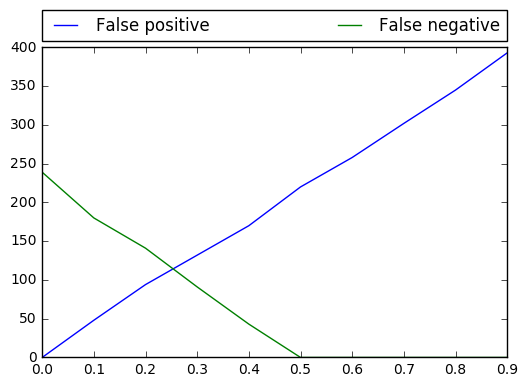

In [39]:
#The chart of variation in values of FN and FP in function of threshold's value
import matplotlib.pyplot as plt

falsePositive = []
falseNegative = []
t = []
th = 0.0
for x in range(0,10):
    rM = ratesInModel(th, target, modelResponse)
    falsePositive.append(rM[2])
    falseNegative.append(rM[3])
    t.append(th)
    th = th + 0.1

plt.plot(t, falsePositive, label="False positive")
plt.plot( t, falseNegative, label="False negative")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.savefig('FPeFN.png')  
plt.show()

In [40]:
#Results considering a threshold in 0.5
result = confusion_matrix(0.5, target, modelResponse)

report(result)

Acuracy: 67.79 %

Rate FP: 49.55 %

Rate FN: 0.00 %

Confusion Matrix:
-------------------
Est\True    P    N
P'        239  220
N'          0  224
